# Домашнее задание: бинарная классификация отзывов с помощью CNN

Применить CNN для анализа тональности текста (положительный/отрицательный отзыв)

Заполните пропущенный код (`### ВАШ КОД ЗДЕСЬ ###`). **Не меняйте структуру ячеек!** Все ответы и графики должны генерироваться автоматически

**Критерии проверки (максимум 10 баллов):**
*   **2 балла** — корректная загрузка и предобработка данных.
*   **3 балла** — корректно собранная модель по спецификации.
*   **2 балла** — успешное обучение модели (вывод истории обучения).
*   **3 балла** — оценка на тесте и выводы (accuracy > 0.85 даёт +1 балл).

---

## БЛОК 1: Загрузка данных

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.KXJPTJ_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.KXJPTJ_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.KXJPTJ_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.
Тренировочные данные: 25000 samples
Тестовые данные: 25000 samples


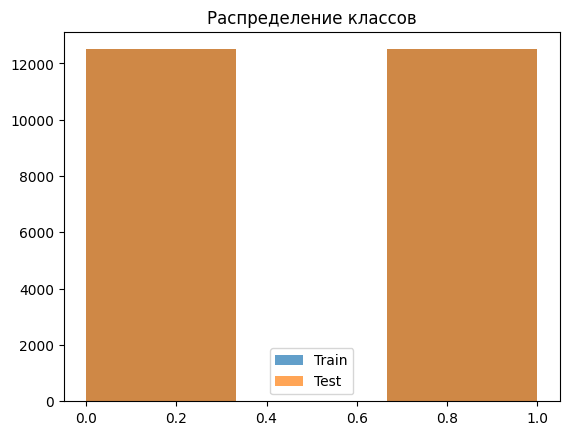

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

# 1. Загрузите датасет IMDB Reviews (бинарная классификация)
### ВАШ КОД ЗДЕСЬ ###
train, test = tfds.load('imdb_reviews', split=['train', 'test'], as_supervised=True)
# Преобразуйте данные в numpy массивы (x_train, y_train), (x_test, y_test)
x_train, y_train = next(iter(tfds.as_numpy(train.batch(len(train)))))
x_test, y_test   = next(iter(tfds.as_numpy(test.batch(len(test)))))
print(f"Тренировочные данные: {len(x_train)} samples")
print(f"Тестовые данные: {len(x_test)} samples")

# 2. Визуализируйте распределение классов
plt.hist(y_train, bins=3, alpha=0.7, label='Train')
plt.hist(y_test, bins=3, alpha=0.7, label='Test')
plt.legend()
plt.title('Распределение классов')
plt.show()

## БЛОК 2: Предобработка текста

In [2]:
# 3. Создайте текстовый векторзатор (TextVectorization)
# Ограничьте словарь 10_000 самых частых слов, максимальную длину последовательности — 200 слов
### ВАШ КОД ЗДЕСЬ ###
vectorizer = keras.layers.TextVectorization(max_tokens=10000, output_sequence_length=200)

# 4. Адаптируйте векторзатор на тренировочных текстах
### ВАШ КОД ЗДЕСЬ ###
vectorizer.adapt(x_train)

# 5. Примените векторзацию к данным
x_train_vec = vectorizer(x_train).numpy()
x_test_vec = vectorizer(x_test).numpy()

print(f"Размерность после векторизации: {x_train_vec.shape}")

Размерность после векторизации: (25000, 200)


## БЛОК 3: Построение модели

In [3]:
# 6. Постройте модель CNN для текста СТРОГО ПО СПЕЦИФИКАЦИИ:
#    - Вход: векторная последовательность (200,)
#    - Embedding: размерность 128, входной словарь 10_000
#    - Conv1D: 64 фильтра, размер ядра 5, активация 'relu'
#    - GlobalMaxPooling1D
#    - Dense: 32 нейрона, 'relu'
#    - Dense: 1 нейрон, 'sigmoid' (бинарная классификация)
### ВАШ КОД ЗДЕСЬ ###
model = keras.Sequential([
    keras.layers.Input((200,)),
    keras.layers.Embedding(10000, 128),
    keras.layers.Conv1D(64, 5, activation='relu'),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(32, 'relu'),
    keras.layers.Dense(1, 'sigmoid')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 196, 64)        │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,323,137 (5.05 MB)

 Trainable params: 1,323,137 (5.05 MB)

 Non-trainable params: 0 (0.00 B)

## БЛОК 4: Обучение

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 71ms/step - Precision: 0.6696 - Recall: 0.7422 - accuracy: 0.6835 - loss: 0.5590 - val_Precision: 0.8300 - val_Recall: 0.8953 - val_accuracy: 0.8542 - val_loss: 0.3240
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - Precision: 0.9249 - Recall: 0.9316 - accuracy: 0.9278 - loss: 0.1953 - val_Precision: 0.8719 - val_Recall: 0.8795 - val_accuracy: 0.8736 - val_loss: 0.3149
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - Precision: 0.9923 - Recall: 0.9883 - accuracy: 0.9904 - loss: 0.0448 - val_Precision: 0.8924 - val_Recall: 0.8483 - val_accuracy: 0.8714 - val_loss: 0.3838
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 70ms/step - Precision: 0.9998 - Recall: 0.9999 - accuracy: 0.9999 - loss: 0.0058 - val_Precision: 0.8708 - val_Recall: 0.8842 - val_accuracy: 0.8750 - val_loss: 0.4448
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - Precision: 1.0000 - Recall: 1.0000 - accuracy: 1.0000 - loss: 9.1558e-04 - val_Precision: 0.8775 - va

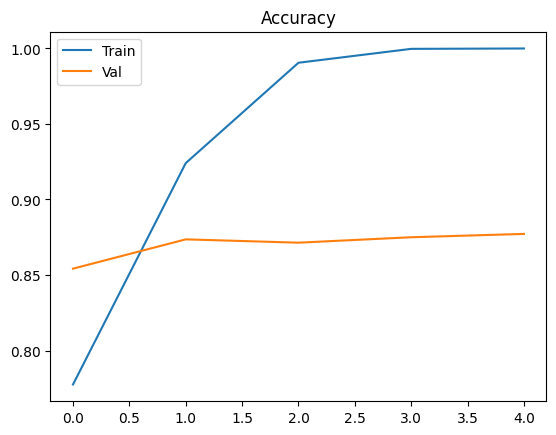

In [4]:
# 7. Скомпилируйте модель с оптимизатором 'adam', функцией потерь 'binary_crossentropy',
#    метриками ['accuracy', 'Precision', 'Recall']
### ВАШ КОД ЗДЕСЬ ###
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall'])

# 8. Обучите модель на 5 эпох с validation_split=0.2, batch_size=32
### ВАШ КОД ЗДЕСЬ ###
history = model.fit(x_train_vec, y_train,
                    epochs=5,
                    validation_split=0.2,
                    batch_size=32,
                    verbose=1)

# 9. Постройте график точности (accuracy) на обучении и валидации
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()
plt.show()

## БЛОК 5: Оценка

In [5]:
# 10. Оцените модель на тестовых данных
### ВАШ КОД ЗДЕСЬ ###
test_loss, test_acc, test_prec, test_rec = model.evaluate(x_test_vec, y_test, verbose=0)

print(f"Тестовая accuracy: {test_acc:.4f}")
print(f"Тестовая precision: {test_prec:.4f}")
print(f"Тестовая recall: {test_rec:.4f}")

# 11. Сделайте предсказания на первых 10 тестовых отзывах
#     и выведите: текст отзыва, истинный класс, предсказанный класс, вероятность
for i in range(10):
    text = x_test[i]
    true_label = "POS" if y_test[i] == 1 else "NEG"
    ### ВАШ КОД ЗДЕСЬ ###
    pred_prob = model.predict(vectorizer(text).numpy().reshape(1,-1))
    pred_label = "POS" if pred_prob > 0.5 else "NEG"
    print(f"{text[:50]}... | True: {true_label} | Pred: {pred_label} ({pred_prob[0][0]:.2f})")

Тестовая accuracy: 0.8678
Тестовая precision: 0.8716
Тестовая recall: 0.8628
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
b'There are films that make careers. For George Rome'... | True: POS | Pred: POS (0.92)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
b'A blackly comic tale of a down-trodden priest, Naz'... | True: POS | Pred: POS (0.99)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
b'Scary Movie 1-4, Epic Movie, Date Movie, Meet the '... | True: NEG | Pred: NEG (0.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
b'Poor Shirley MacLaine tries hard to lend some grav'... | True: NEG | Pred: NEG (0.01)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
b'As a former Erasmus student I enjoyed this film ve'... | True: POS | Pred: POS (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
b'My God, Ryan Gosling has made a lot of deep charac'... | True: POS | Pred: POS (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
b'This film just won the best film award at the Clev'... | True: POS | Pred: POS (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
b'

In [23]:
x_test[9]

b"Every great once in a while, you stumble upon a movie that exceeds even your wildest expectations. Given the IMDb rating of 4.0, I wasn't really expecting much with The Brotherhood of Satan. I hoped that at a minimum it might be cheesy fun like The Devil's Rain or any of the other early 70s similarly themed Satanic horror films. I couldn't' have been more wrong. What I got instead was an ambitious and intelligent film with a cast I really enjoyed. Speaking in broad terms to avoid giving anything away, the film's style and structure are much more experimental than the straightforward storytelling so prominent in the early 70s. The Brotherhood of Satan doesn't beat you over the head with plot points and explanations. A lot is left to the viewer to fill in the blanks. As a viewer, you know something is amiss, but for the longest period you're just not sure what it is. The unknown helps make for a far creepier atmosphere than most similar films. The ending is effective with its surreal i

## БЛОК 6: Выводы

**Ответьте на вопросы в этой ячейке (текстом):**

1.  Какая итоговая точность (accuracy) на тесте?
2.  Что показывает разница между точностью на обучении и валидации? Есть ли переобучение?
3.  Какой из 10 показанных отзывов был классифицирован неверно? Почему, на ваш взгляд?

**Мои ответы:**
1.  Итоговая точность на тесте - 0.8678.
2.  Точность на обучении на каждом этапе растет (сначала быстро, потом медленно) вплоть до значения 1.00, а вот на валидации начинает колебаться со второго этапа (0.8542, 0.8736, 0.8714, 0.8750, 0.8772). Такая ситуация говорит о переобучении.
3.  Неверно классифицирован отзыв №10, потому что, как мне кажется, его автор для контраста много рассуждает о других гипотетических более плохих фильмах ("lesser film"), чтобы подчеркнуть преимущества того, которому посвящен отзыв. Короче, много "негативной" лексики в отношении не-таких-как-этот фильмов, что запутало модельку.